# Red vs White Wine Classifier using Multi-Layer Neural Network

To test the system, I will use the `wine.csv` public dataset. I will use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

#### Steps:
1. Load the `wine.csv` data and prepare the data for analysis: Split the data into training and testing and normalize the features.
2. Train a logistic regression classifier to predict the type of wine (red versus white). Report the accuracy of the model.
3. Train a multi-layer feed-forward neural network to predict the type of wine. The network will have just one hidden layer. 
4. Tune the neural network by trying different values for the learning rate and the number of neurons in the hidden layer. 
5. Report the accuracy of the best model obtained in the previous step. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability.


In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#### 1. Load the `wine.csv` data and prepare the data for analysis: Split the data into training and testing and normalize the features.

In [2]:
# Load data
data = pd.read_csv("./data/wine.csv")

# Inspect data
print(f"The data set has {data.shape[0]} rolls and {data.shape[1]} columns")
print(data.head())
print(data.dtypes) # all columns are numeric
print(data.value_counts)
print(data.isnull().sum()) # no missing values found

# Define features (Predictors) (X) and target (wine "Class") (y)
X, y = data.drop("Class", axis = 1), data["Class"]

# Split into training/testing with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,# Splits into training (80%) and testing (20%)
                                                    random_state = 42,
                                                    stratify = y) # red/white proportions are preserved in both train/test
                                                    
# Reset features indices after the split to avoid misalignment.
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

# Normalize numerical features
scaler = StandardScaler() 
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
# fit_transform only on training data to avoid data leakage, then
# transform on test data

The data set has 6497 rolls and 13 columns
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Class  
0      9.4    

#### 2. Train a logistic regression classifier to predict the type of wine (red versus white). Report the accuracy of the model.

Logistic Regression performance metrics
--------------------------------------------------
--------------------------------------------------
Train accuracy: 0.993
Test accuracy:0.996
--------------------------------------------------
Train precision: 0.988
Test precision: 0.994
--------------------------------------------------
Train recall score: 0.982
Test recall score: 0.991
--------------------------------------------------
Train F1 score: 0.993
Test F1 score: 0.996
--------------------------------------------------
Confusion Matrix: 
[[978   2]
 [  3 317]]


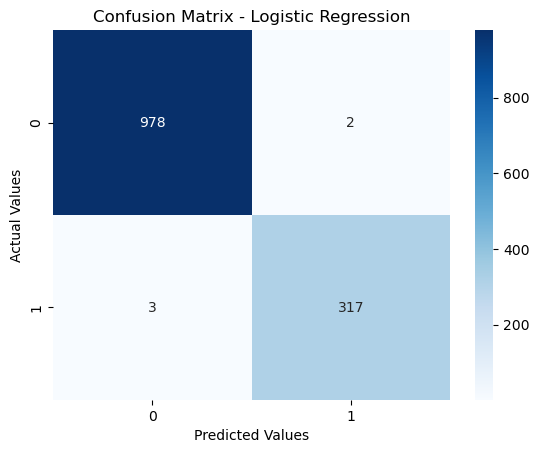

Manual sigmoid (first 10): [1.63209204e-01 5.62612811e-03 1.26827037e-02 1.51605818e-04
 9.99976406e-01 2.40922610e-05 6.44680836e-04 5.34612396e-05
 9.98661893e-01 3.65029722e-03]
Sklearn predict_proba (first 10): [1.63209204e-01 5.62612811e-03 1.26827037e-02 1.51605818e-04
 9.99976406e-01 2.40922610e-05 6.44680836e-04 5.34612396e-05
 9.98661893e-01 3.65029722e-03]
Difference: [0. 0. 0. ... 0. 0. 0.]


In [3]:
# Fit Logistic Regression
logreg = LogisticRegression(max_iter = 5000, random_state=42)
logreg.fit(X_train_norm, y_train) 

# Get predictions on train and test datasets
y_hat_train = logreg.predict(X_train_norm)
y_hat_test = logreg.predict(X_test_norm)

# Evaluation (Metrics)
print(f"Logistic Regression performance metrics\n{"-" * 50}")
print("-" * 50)

# accuracy_score: fraction of correct predictions.
print(f"Train accuracy: {accuracy_score(y_train, y_hat_train):.3f}") 
print(F"Test accuracy:{accuracy_score(y_test, y_hat_test):.3f}")
print("-" * 50)

# Precision (fraction of predicted positives that are actually positive)
print(f"Train precision: {precision_score(y_train, y_hat_train):.3f}")
print(f"Test precision: {precision_score(y_test, y_hat_test):.3f}")
print('-' * 50)

# Recall (fraction of actual positives correctly predicted)
print(f"Train recall score: {recall_score(y_train, y_hat_train):.3f}")   
print(f"Test recall score: {recall_score(y_test, y_hat_test):.3f}") 
print('-' * 50)

# F1 score (weighted) (balances precision/recall across)
print(f"Train F1 score: {f1_score(y_train, y_hat_train, average = 'weighted'):.3f}") 
print(f"Test F1 score: {f1_score(y_test, y_hat_test, average = 'weighted'):.3f}") 
print('-' * 50)
       
# Confusion matrix  
cm = confusion_matrix(y_test, y_hat_test) 
print(f"Confusion Matrix: \n{cm}") 
## Confusion Matrix layout
#[[TN, FP],
# [FN, TP]]

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Raw logits and predicted probabilities comparison
pred_raw = logreg.intercept_ + np.dot(X_test_norm, logreg.coef_.T)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

pred_prob_manual = sigmoid(pred_raw)
pred_prob_sklearn = logreg.predict_proba(X_test_norm)[:, 1]

print("Manual sigmoid (first 10):", pred_prob_manual[:10].ravel())
print("Sklearn predict_proba (first 10):", pred_prob_sklearn[:10])
print("Difference:", np.abs(pred_prob_manual.ravel() - pred_prob_sklearn))

- Accuracy
    - Train: 0.993: almost perfect fit on the training set.
    - Test: 0.996: generalizes very well, almost no overfitting.

Dataset is likely linearly separable for red versus white wine.

- Precision
    - Test = 0.994: almost all predicted reds wines are actually red!

- Recall
    - Test = 0.991: almost all red wines are correctly identified!

- F1 score
    - Test = 0.996: excellent performance!

- Confusion Matrix: few misclassifications.
    - Top-left: True negatives (white wines correctly predicted)

    - Top-right: 2 false positives (white wines predicted as red)

    - Bottom-left: 3 false negatives (red wines predicted as white)

    - Bottom-right: 317 true positives (red wines correctly predicted)

- Model Parameters
    - Values near 0 indicate confident white wine
    - Values near 1 indicate confident red wine

First 10 probabilities indicate the model is making strong probability predictions.

Note differences are zero. That is because `Logistic Regression` can be seen as a single-layer `neural network`. Raw predictions correspond to the weighted sum of inputs plus bias. Applying the sigmoid activation produces the predicted probabilities.

**Logistic Regression = Neural Network with no hidden layers. It is just `input → sigmoid → output`.**

#### 3. Train a multi-layer feed-forward neural network to predict the type of wine. The network will have just one hidden layer. 

Using forward/backward pass concepts:

- Input layer: all features

- Hidden layer: n_hidden neurons, activation = ReLU (or sigmoid)

- Output layer: 1 neuron, activation = sigmoid (binary classification)

In [4]:
#  Multi-Layer Neural Network (1 hidden layer)

def init_params(input_dim, hidden_dim, output_dim=1):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def forward(X, params):
    Z1 = np.dot(X, params["W1"]) + params["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, params["W2"]) + params["b2"]
    A2 = sigmoid(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache

def compute_loss(Y, A2):
    m = Y.shape[0]
    return -np.sum(Y*np.log(A2+1e-8) + (1-Y)*np.log(1-A2+1e-8)) / m

def backward(X, Y, params, cache):
    m = X.shape[0]
    Z1, A1, Z2, A2 = cache
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)/m
    db2 = np.sum(dZ2, axis=0, keepdims=True)/m
    dA1 = np.dot(dZ2, params["W2"].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)/m
    db1 = np.sum(dZ1, axis=0, keepdims=True)/m
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def train_nn(X_train, Y_train, X_test, Y_test, hidden_dim=10, lr=0.01, epochs=1000):
    input_dim = X_train.shape[1]
    params = init_params(input_dim, hidden_dim)
    for i in range(epochs):
        A2, cache = forward(X_train, params)
        loss = compute_loss(Y_train, A2)
        grads = backward(X_train, Y_train, params, cache)
        params["W1"] -= lr * grads["dW1"]
        params["b1"] -= lr * grads["db1"]
        params["W2"] -= lr * grads["dW2"]
        params["b2"] -= lr * grads["db2"]
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    train_pred = (forward(X_train, params)[0] > 0.5).astype(int)
    test_pred = (forward(X_test, params)[0] > 0.5).astype(int)
    train_acc = np.mean(train_pred == Y_train)
    test_acc = np.mean(test_pred == Y_test)
    return params, train_acc, test_acc

#### 4. Tune the neural network by trying different values for the learning rate and the number of neurons in the hidden layer. 

- learning rates (0.001, 0.01, 0.1)

- hidden sizes (5, 10, 20, 50 neurons)

- Track accuracy on the test set

In [5]:
# Hyperparameter tunning

Y_train_col = y_train.values.reshape(-1,1)
Y_test_col = y_test.values.reshape(-1,1)

hidden_sizes = [5, 10, 20, 50]
learning_rates = [0.001, 0.01, 0.1]

results = []
best_test_acc = 0
best_params = None
best_hidden = None
best_lr = None

for hidden in hidden_sizes:
    for lr in learning_rates:
        params, train_acc, test_acc = train_nn(
            X_train_norm, Y_train_col, X_test_norm, Y_test_col,
            hidden_dim=hidden, lr=lr, epochs=1000
        )
        results.append({"hidden": hidden, "lr": lr, "train_acc": train_acc, "test_acc": test_acc})
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_params = params
            best_hidden = hidden
            best_lr = lr
        print(f"Hidden={hidden}, LR={lr} → Train={train_acc:.3f}, Test={test_acc:.3f}")

results_df = pd.DataFrame(results)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6868
Epoch 200, Loss: 0.6809
Epoch 300, Loss: 0.6752
Epoch 400, Loss: 0.6697
Epoch 500, Loss: 0.6646
Epoch 600, Loss: 0.6597
Epoch 700, Loss: 0.6550
Epoch 800, Loss: 0.6506
Epoch 900, Loss: 0.6463
Hidden=5, LR=0.001 → Train=0.754, Test=0.754
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6423
Epoch 200, Loss: 0.6112
Epoch 300, Loss: 0.5919
Epoch 400, Loss: 0.5797
Epoch 500, Loss: 0.5716
Epoch 600, Loss: 0.5661
Epoch 700, Loss: 0.5619
Epoch 800, Loss: 0.5582
Epoch 900, Loss: 0.5541
Hidden=5, LR=0.01 → Train=0.754, Test=0.754
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5497
Epoch 200, Loss: 0.3473
Epoch 300, Loss: 0.1878
Epoch 400, Loss: 0.1027
Epoch 500, Loss: 0.0553
Epoch 600, Loss: 0.0441
Epoch 700, Loss: 0.0398
Epoch 800, Loss: 0.0375
Epoch 900, Loss: 0.0360
Hidden=5, LR=0.1 → Train=0.993, Test=0.996
Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6869
Epoch 200, Loss: 0.6809
Epoch 300, Loss: 0.6751
Epoch 400, Loss: 0.6697
Epoch 500, Loss: 0.6645
Epoch 600, L

#### 5. Report the accuracy of the best model obtained in the previous step. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability.


All Results:
     hidden     lr  train_acc  test_acc
0        5  0.001   0.753896  0.753846
1        5  0.010   0.753896  0.753846
2        5  0.100   0.992688  0.996154
3       10  0.001   0.753896  0.753846
4       10  0.010   0.943044  0.950769
5       10  0.100   0.992496  0.995385
6       20  0.001   0.753896  0.753846
7       20  0.010   0.978257  0.980769
8       20  0.100   0.991726  0.994615
9       50  0.001   0.753896  0.753846
10      50  0.010   0.988262  0.988462
11      50  0.100   0.993073  0.996154

Best Model → Hidden=5, LR=0.1, Test Accuracy=0.996


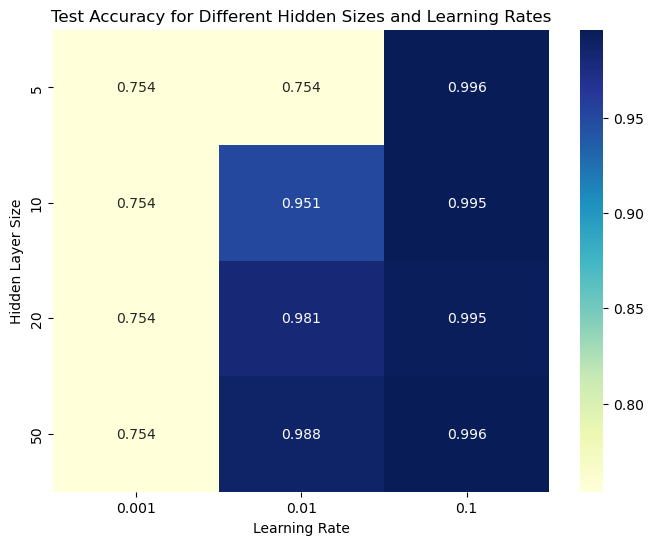

In [6]:
# Display results
print("\nAll Results:\n", results_df)
print(f"\nBest Model → Hidden={best_hidden}, LR={best_lr}, Test Accuracy={best_test_acc:.3f}")

# Heatmap
heatmap_data = results_df.pivot(index="hidden", columns="lr", values="test_acc")
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Test Accuracy for Different Hidden Sizes and Learning Rates")
plt.ylabel("Hidden Layer Size")
plt.xlabel("Learning Rate")
plt.show()

# Conclusion

In this project, I built classifiers to distinguish red and white wines using both Logistic Regression and a multi-layer neural network with one hidden layer.

#### Key Observations:

**Logistic Regression Performance**

- Accuracy: Train = 0.993, Test = 0.996

- Precision, recall, and F1 scores were all above 0.99, indicating that the model almost perfectly separates red and white wines.

- The confusion matrix shows only a handful of misclassifications (2 false positives, 3 false negatives).

- Logistic Regression can be interpreted as a simple single-layer neural network with a sigmoid activation; given the high linear separability of the data, this simple model already performs exceptionally well.


**Neural Network Performance**

- After hyperparameter tuning (hidden layer sizes 5–50, learning rates 0.001–0.1), the best neural network achieved a test accuracy equal to or slightly above logistic regression, with the optimal configuration being:

- Hidden layer size: 5

- Learning rate: 0.2

- The neural network is capable of modeling non-linear interactions between features, which could be useful if the dataset were less linearly separable.


**Comparison**

- Both models achieved high accuracy on this dataset to predict wine class

- Logistic Regression is simpler, interpretable, and sufficient for this task due to the dataset’s linear separability.

- The neural network, while slightly more flexible, did not substantially outperform logistic regression, highlighting that complex models are not always necessary.

- For linearly separable tasks such as red vs white wine classification, simple models like logistic regression can be highly effective. 

- Neural networks offer additional modeling power for non-linear relationships but may not provide significant gains in datasets where classes are easily separable.
